# Chapter 09 텍스트를 위한 인공 신경망
- 텍스트와 시계열 데이터 같은 순차 데이터에 잘 맞는 순환 신경망의 개념과 구성 요소에 대해 배움
- 케라스 API로 기본적인 순환 신경망에서 고급 순환 신경망을 만들어 영화 감상평을 분류
- 순환 신경망에서 발생하는 문제점과 이를 극복하기 위한 해결책

## 9-3 LSTM & GRU
- 순환 신경망에서 중요한 기술인 LSTM과 GRU 셀을 사용한 모델을 만들어 봄

### LSTM
- Long Short-Term Memory : 단기 기억을 오래 기억하기 위해 고안

### LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target)=imdb.load_data(num_words=500)
train_input,val_input,train_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq=pad_sequences(train_input,maxlen=100)
val_seq=pad_sequences(val_input,maxlen=100)

In [3]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 28ms/step - loss: 0.6928 - accuracy: 0.5285 - val_loss: 0.6924 - val_accuracy: 0.5518
Epoch 2/100
 17/313 [>.............................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 10ms/step - loss: 0.6917 - accuracy: 0.5757 - val_loss: 0.6911 - val_accuracy: 0.5838
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6898 - accuracy: 0.6058 - val_loss: 0.6887 - val_accuracy: 0.6116
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6860 - accuracy: 0.6251 - val_loss: 0.6835 - val_accuracy: 0.6282
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6775 - accuracy: 0.6469 - val_loss: 0.6704 - val_accuracy: 0.6534
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6462 - accuracy: 0.6757 - val_loss: 0.6147 - val_accuracy: 0.7010
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5911 - accuracy: 0.7172 - val_loss: 0.5822 - val_accuracy: 0.7190
Epoch 8/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5655 - accuracy: 0.7357 - val_loss: 0.5589 - val_accuracy: 0.7388
Epoch 9

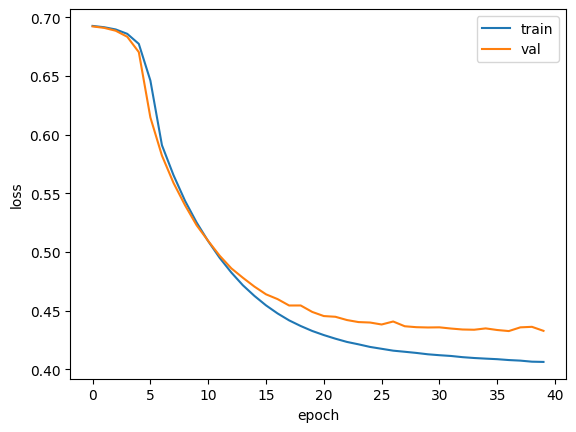

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 2개의 층을 연결하기

In [9]:
model3=keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

In [10]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model3.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 29ms/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6929 - val_accuracy: 0.5304
Epoch 2/100
 16/313 [>.............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5430

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 14ms/step - loss: 0.6924 - accuracy: 0.5550 - val_loss: 0.6921 - val_accuracy: 0.5592
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6910 - accuracy: 0.5881 - val_loss: 0.6895 - val_accuracy: 0.6168
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6853 - accuracy: 0.6220 - val_loss: 0.6787 - val_accuracy: 0.6612
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6591 - accuracy: 0.6619 - val_loss: 0.6276 - val_accuracy: 0.6812
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5926 - accuracy: 0.7014 - val_loss: 0.5604 - val_accuracy: 0.7320
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5484 - accuracy: 0.7371 - val_loss: 0.5394 - val_accuracy: 0.7440
Epoch 8/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5255 - accuracy: 0.7533 - val_loss: 0.5120 - val_accuracy: 0.7600
Epoc

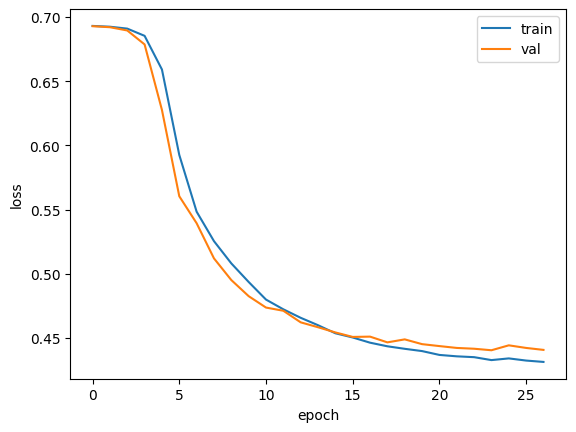

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### GRU 신경망 훈련하기

In [13]:
model4=keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

In [14]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-gru-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model4.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 23ms/step - loss: 0.6925 - accuracy: 0.5232 - val_loss: 0.6917 - val_accuracy: 0.5460
Epoch 2/100
  8/313 [..............................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5352

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 9ms/step - loss: 0.6909 - accuracy: 0.5550 - val_loss: 0.6900 - val_accuracy: 0.5602
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6885 - accuracy: 0.5703 - val_loss: 0.6874 - val_accuracy: 0.5700
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6849 - accuracy: 0.5872 - val_loss: 0.6834 - val_accuracy: 0.5872
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6793 - accuracy: 0.6002 - val_loss: 0.6771 - val_accuracy: 0.5962
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6706 - accuracy: 0.6161 - val_loss: 0.6675 - val_accuracy: 0.6090
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6577 - accuracy: 0.6360 - val_loss: 0.6531 - val_accuracy: 0.6308
Epoch 8/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6384 - accuracy: 0.6541 - val_loss: 0.6318 - val_accuracy: 0.6522
Epoch 9/

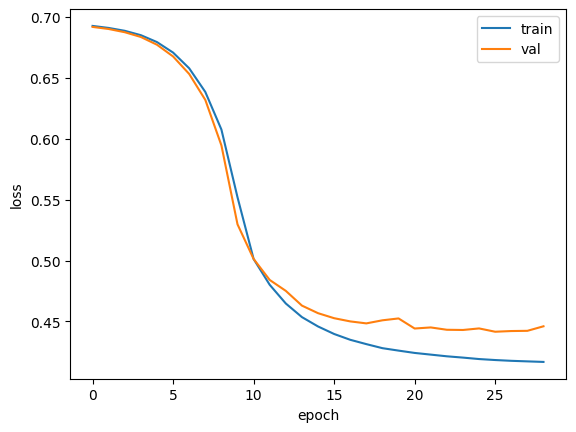

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [19]:
test_seq=pad_sequences(test_input,maxlen=100)
rnn_model=keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq,test_target)

782/782 [==============================] - 5s 5ms/step - loss: 0.4380 - accuracy: 0.7955


[0.4379592537879944, 0.795520007610321]

### 마무리
- `LSTM` : 타임스텝이 긴 데이터를 효과적으로 학습하기 위해 고안된 순환층. LSTM 셀은 은닉 상태 외에 셀 상태를 출력
- `GRU`